In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # We'll use this to create a new folder

# Set options to see all columns
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

# Display the first 5 rows
print("Original data:")
df.head()

Original data:


,timestamp,solar_output,wind_output,total_renewable,solar_irradiance,wind_speed,temperature,humidity,pressure,load_demand,grid_frequency,grid_voltage,grid_exchange,battery_soc,battery_charge,battery_discharge,hour,day_of_week,predicted_solar_output,predicted_wind_output,predicted_total_energy
0,01-01-2023 00:00:00,37.454012,8.273684,45.727695,751.423457,18.770285,18.094905,53.215610,1004.872349,294.401249,49.123760,228.933029,-30.551108,10.385097,45.365558,36.183096,0,6,38.977832,8.698819,47.676652
1,01-01-2023 01:00:00,95.071431,48.453800,143.525230,301.682091,6.638605,11.669042,63.906997,1009.493484,185.824084,49.908870,223.617160,-2.023332,86.303649,7.791319,7.240728,1,6,86.059893,53.233701,139.293594
2,01-01-2023 02:00:00,73.199394,30.241951,103.441345,485.378535,14.296742,12.945826,26.234179,970.753013,347.363574,49.575119,222.854681,94.963947,92.269351,41.131011,21.848509,2,6,76.027574,29.339777,105.367351
3,01-01-2023 03:00:00,59.865848,56.340836,116.206685,673.986395,22.357572,38.478603,53.165238,970.833286,193.641771,49.549129,227.861872,52.712924,48.242636,35.145735,14.418611,3,6,65.121215,52.111132,117.232347
4,01-01-2023 04:00:00,15.601864,80.380489,95.982353,868.457364,11.879943,4.807723,69.228330,977.621817,244.023572,49.444763,221.981539,70.347948,42.547153,48.760586,49.343433,4,6,14.599554,81.561628,96.161182


In [4]:
# Check column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               3546 non-null   object 
 1   solar_output            3546 non-null   float64
 2   wind_output             3546 non-null   float64
 3   total_renewable         3546 non-null   float64
 4   solar_irradiance        3546 non-null   float64
 5   wind_speed              3546 non-null   float64
 6   temperature             3546 non-null   float64
 7   humidity                3546 non-null   float64
 8   pressure                3546 non-null   float64
 9   load_demand             3546 non-null   float64
 10  grid_frequency          3546 non-null   float64
 11  grid_voltage            3546 non-null   float64
 12  grid_exchange           3546 non-null   float64
 13  battery_soc             3546 non-null   float64
 14  battery_charge          3546 non-null   

In [5]:
print("Starting data cleaning...")

# 1. Convert 'timestamp' from string to a real datetime object
# The format '%d-%m-%Y %H:%M:%S' matches how the date looks in our CSV
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M:%S')

# 2. Set the timestamp as the index. This is standard for time-series.
df = df.set_index('timestamp')

# 3. Drop columns we don't need
# These are either pre-calculated, future predictions, or just not useful
columns_to_drop = [
    'total_renewable',
    'predicted_solar_output',
    'predicted_wind_output',
    'predicted_total_energy',
    'hour',  # We'll make our own
    'day_of_week'  # We'll make our own
]
df = df.drop(columns=columns_to_drop)

print("Data cleaned. New data:")
df.head()

Starting data cleaning...
Data cleaned. New data:


,solar_output,wind_output,solar_irradiance,wind_speed,temperature,humidity,pressure,load_demand,grid_frequency,grid_voltage,grid_exchange,battery_soc,battery_charge,battery_discharge
timestamp,,,,,,,,,,,,,,
2023-01-01 00:00:00,37.454012,8.273684,751.423457,18.770285,18.094905,53.215610,1004.872349,294.401249,49.123760,228.933029,-30.551108,10.385097,45.365558,36.183096
2023-01-01 01:00:00,95.071431,48.453800,301.682091,6.638605,11.669042,63.906997,1009.493484,185.824084,49.908870,223.617160,-2.023332,86.303649,7.791319,7.240728
2023-01-01 02:00:00,73.199394,30.241951,485.378535,14.296742,12.945826,26.234179,970.753013,347.363574,49.575119,222.854681,94.963947,92.269351,41.131011,21.848509
2023-01-01 03:00:00,59.865848,56.340836,673.986395,22.357572,38.478603,53.165238,970.833286,193.641771,49.549129,227.861872,52.712924,48.242636,35.145735,14.418611
2023-01-01 04:00:00,15.601864,80.380489,868.457364,11.879943,4.807723,69.228330,977.621817,244.023572,49.444763,221.981539,70.347948,42.547153,48.760586,49.343433


In [6]:
print("Starting feature engineering...")

# 1. Create Temporal Features (from the index)
# This is how the model learns daily, weekly, and yearly cycles
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

# 2. Create Lag Features
# We give the model a hint by telling it the value from 1 hour ago
df['load_demand_lag1'] = df['load_demand'].shift(1)
df['solar_irradiance_lag1'] = df['solar_irradiance'].shift(1)
df['wind_speed_lag1'] = df['wind_speed'].shift(1)

# 3. Create Rolling Average Features
# This smooths out short-term noise and gives the model the recent trend
window_size = 3
df['wind_speed_roll_3h'] = df['wind_speed'].rolling(window=window_size).mean()
df['solar_irradiance_roll_3h'] = df['solar_irradiance'].rolling(window=window_size).mean()
df['load_roll_3h'] = df['load_demand'].rolling(window=window_size).mean()

print("Feature engineering complete. Data with new features:")
df.head()

Starting feature engineering...
Feature engineering complete. Data with new features:


,solar_output,wind_output,solar_irradiance,wind_speed,temperature,humidity,pressure,load_demand,grid_frequency,grid_voltage,grid_exchange,battery_soc,battery_charge,battery_discharge,hour,day_of_week,month,day_of_year,load_demand_lag1,solar_irradiance_lag1,wind_speed_lag1,wind_speed_roll_3h,solar_irradiance_roll_3h,load_roll_3h
timestamp,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,37.454012,8.273684,751.423457,18.770285,18.094905,53.215610,1004.872349,294.401249,49.123760,228.933029,-30.551108,10.385097,45.365558,36.183096,0,6,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 01:00:00,95.071431,48.453800,301.682091,6.638605,11.669042,63.906997,1009.493484,185.824084,49.908870,223.617160,-2.023332,86.303649,7.791319,7.240728,1,6,1,1,294.401249,751.423457,18.770285,NaN,NaN,NaN
2023-01-01 02:00:00,73.199394,30.241951,485.378535,14.296742,12.945826,26.234179,970.753013,347.363574,49.575119,222.854681,94.963947,92.269351,41.131011,21.848509,2,6,1,1,185.824084,301.682091,6.638605,13.235210,512.828028,275.862969
2023-01-01 03:00:00,59.865848,56.340836,673.986395,22.357572,38.478603,53.165238,970.833286,193.641771,49.549129,227.861872,52.712924,48.242636,35.145735,14.418611,3,6,1,1,347.363574,485.378535,14.296742,14.430973,487.015674,242.276476
2023-01-01 04:00:00,15.601864,80.380489,868.457364,11.879943,4.807723,69.228330,977.621817,244.023572,49.444763,221.981539,70.347948,42.547153,48.760586,49.343433,4,6,1,1,193.641771,673.986395,22.357572,16.178086,675.940765,261.676306


Plotting Target Variables (Demand, Solar, and Wind)...


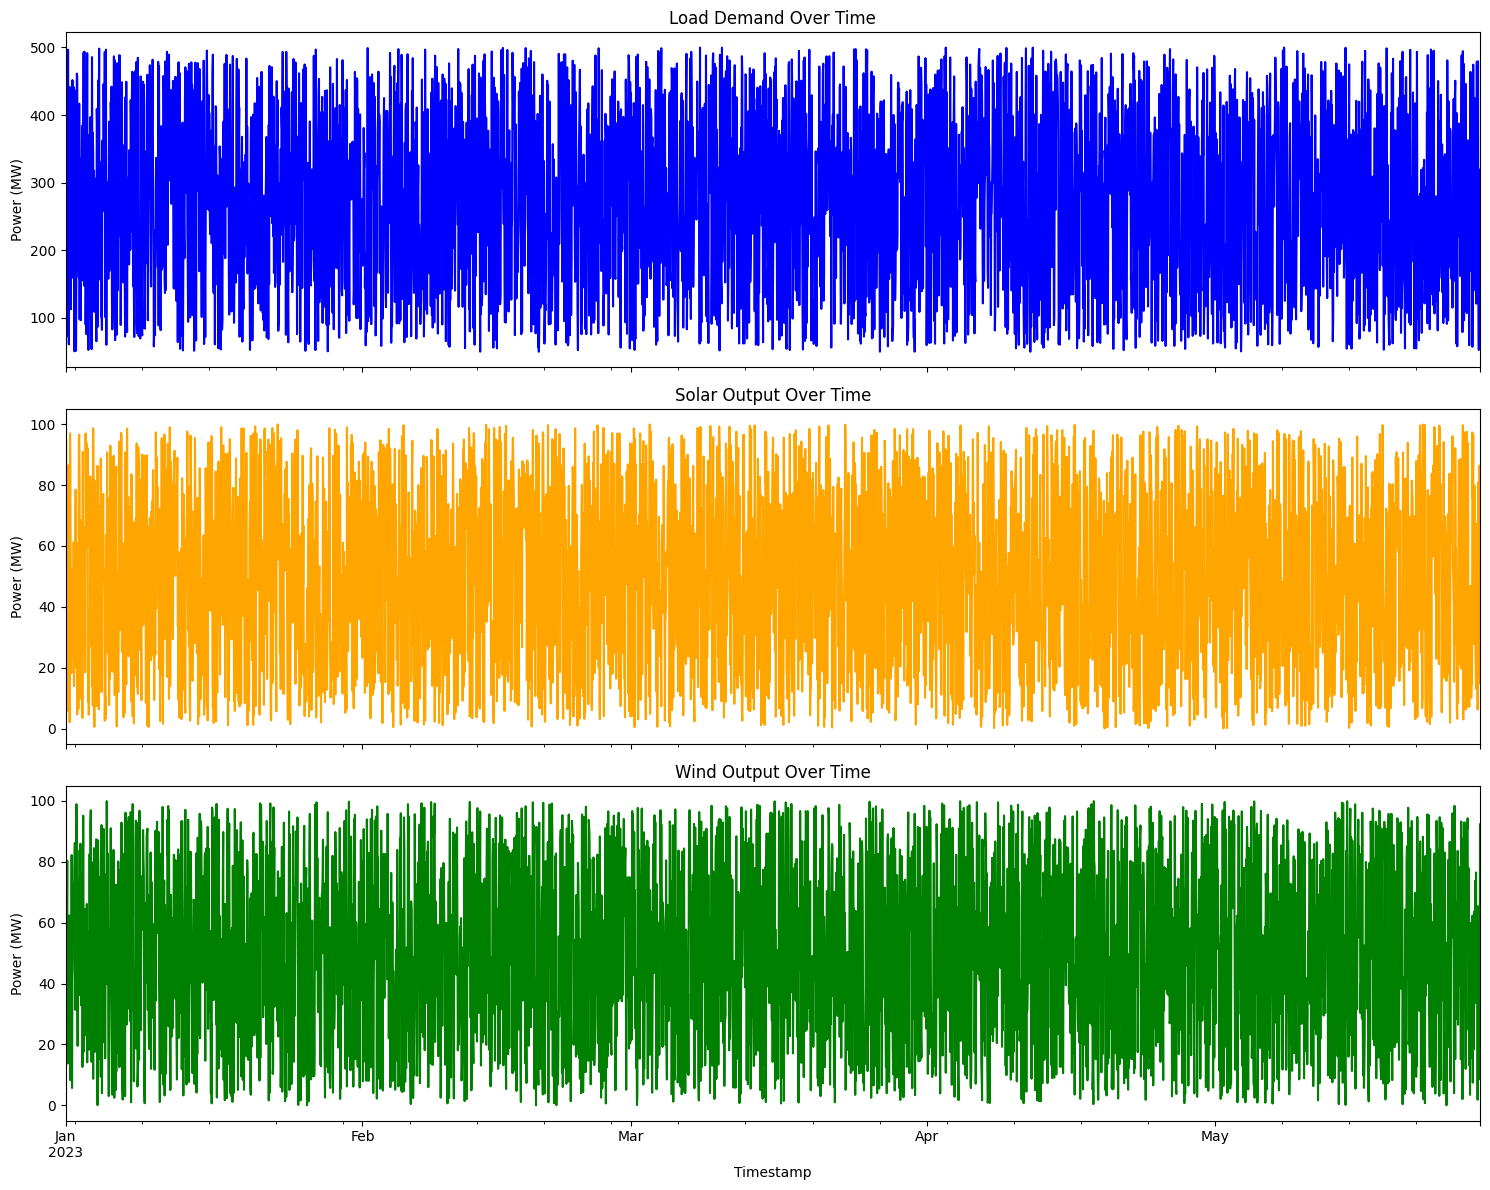

In [7]:
# --- Visualize Target Variables ---

print("Plotting Target Variables (Demand, Solar, and Wind)...")

fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Use 'df', which is our cleaned DataFrame
df['load_demand'].plot(ax=axes[0], title='Load Demand Over Time', color='blue')
axes[0].set_ylabel('Power (MW)')

df['solar_output'].plot(ax=axes[1], title='Solar Output Over Time', color='orange')
axes[1].set_ylabel('Power (MW)')

df['wind_output'].plot(ax=axes[2], title='Wind Output Over Time', color='green')
axes[2].set_ylabel('Power (MW)')

plt.xlabel('Timestamp')
plt.tight_layout()

plt.savefig('target_variables.png')
plt.show()

Plotting Feature Distributions...


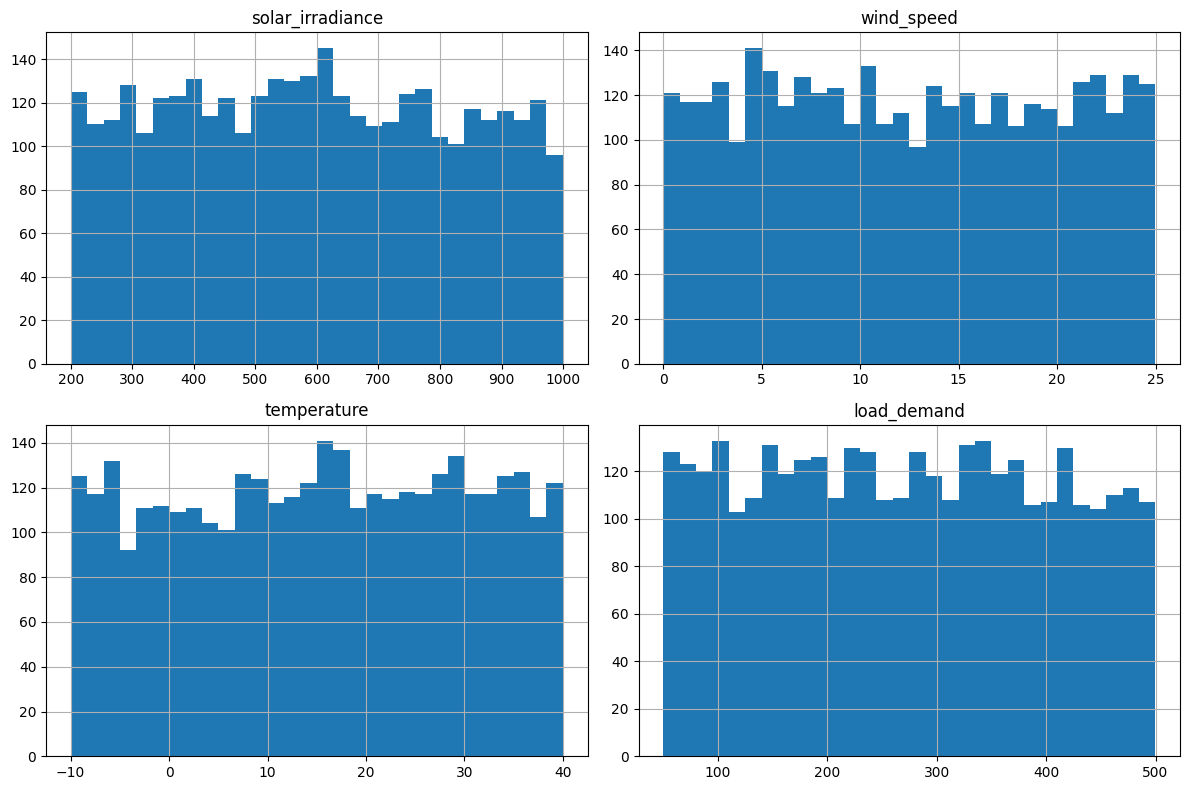

In [8]:
# --- Visualize Feature Distributions ---

print("Plotting Feature Distributions...")

# We'll plot the main weather features and the load
features_to_plot = ['solar_irradiance', 'wind_speed', 'temperature', 'load_demand']
df[features_to_plot].hist(bins=30, figsize=(12, 8))
plt.tight_layout()

plt.savefig('feature_distributions.png')
plt.show()

Calculating and plotting correlation heatmap...


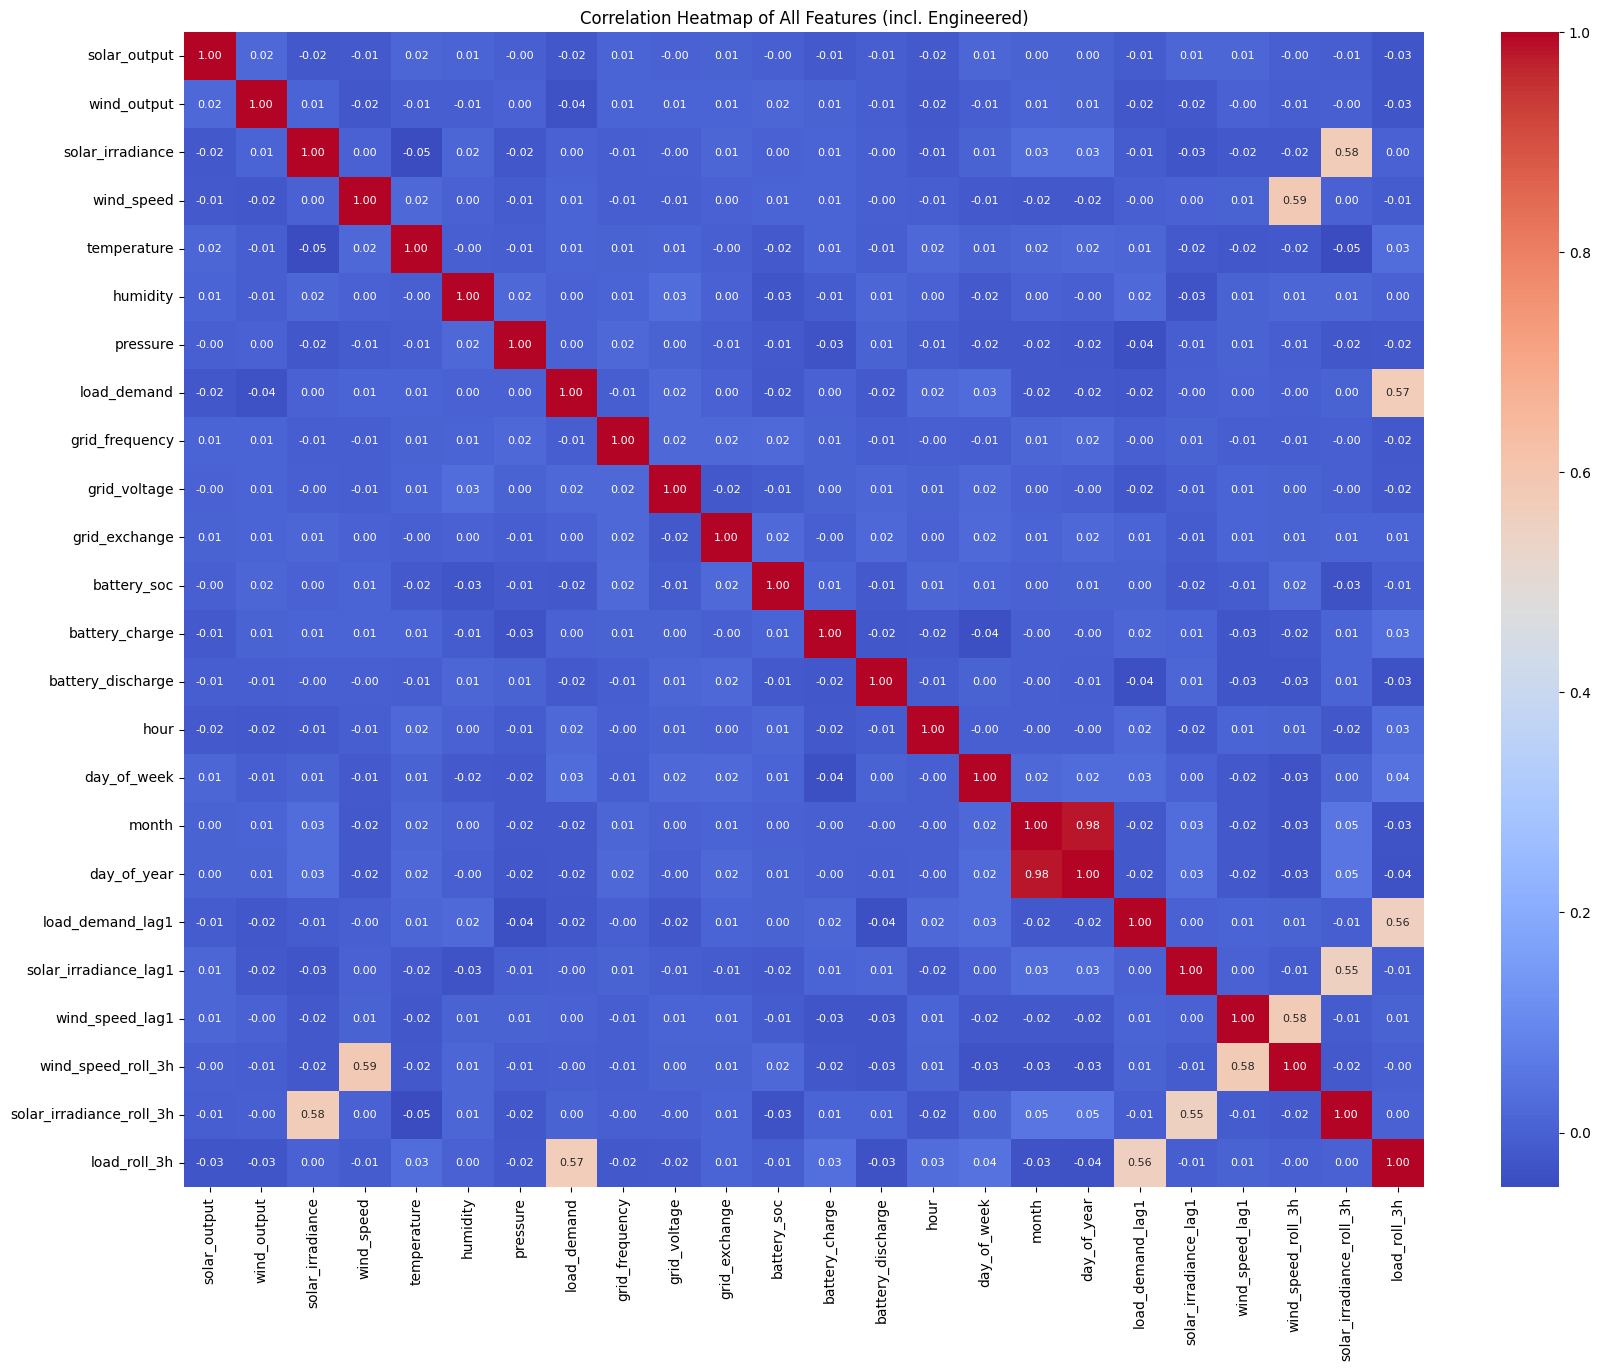

In [9]:
# --- Plot Correlation Heatmap ---

print("Calculating and plotting correlation heatmap...")

# Calculate the correlation matrix
# This will show how all our new features relate to the targets
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15)) # Made this bigger to fit all our new features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Heatmap of All Features (incl. Engineered)')

plt.savefig('correlation_heatmap.png')
plt.show()

In [10]:
# Drop the first few rows that have NaN values from our new features
df = df.dropna()

print("Final, clean dataset:")
df.head()

Final, clean dataset:


,solar_output,wind_output,solar_irradiance,wind_speed,temperature,humidity,pressure,load_demand,grid_frequency,grid_voltage,grid_exchange,battery_soc,battery_charge,battery_discharge,hour,day_of_week,month,day_of_year,load_demand_lag1,solar_irradiance_lag1,wind_speed_lag1,wind_speed_roll_3h,solar_irradiance_roll_3h,load_roll_3h
timestamp,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01 02:00:00,73.199394,30.241951,485.378535,14.296742,12.945826,26.234179,970.753013,347.363574,49.575119,222.854681,94.963947,92.269351,41.131011,21.848509,2,6,1,1,185.824084,301.682091,6.638605,13.235210,512.828028,275.862969
2023-01-01 03:00:00,59.865848,56.340836,673.986395,22.357572,38.478603,53.165238,970.833286,193.641771,49.549129,227.861872,52.712924,48.242636,35.145735,14.418611,3,6,1,1,347.363574,485.378535,14.296742,14.430973,487.015674,242.276476
2023-01-01 04:00:00,15.601864,80.380489,868.457364,11.879943,4.807723,69.228330,977.621817,244.023572,49.444763,221.981539,70.347948,42.547153,48.760586,49.343433,4,6,1,1,193.641771,673.986395,22.357572,16.178086,675.940765,261.676306
2023-01-01 05:00:00,15.599452,13.714849,234.928743,23.627938,21.366223,48.943580,1021.172159,73.562168,49.665057,239.149290,1.129914,53.903928,23.165328,20.769785,5,6,1,1,244.023572,868.457364,11.879943,19.288484,592.457501,170.409170
2023-01-01 06:00:00,5.808361,58.069908,389.306505,5.361456,11.003133,71.150260,1010.626606,496.642132,49.706266,220.950784,5.224722,22.619462,36.108719,3.393505,6,6,1,1,73.562168,234.928743,23.627938,13.623112,497.564204,271.409291


In [12]:
# 1. Get the current directory (which is '.../Week 1')
current_dir = os.getcwd()

# 2. Get the parent directory (the main project folder)
main_project_folder = os.path.dirname(current_dir)
# Alternatively, you can use: main_project_folder = os.path.join(current_dir, '..')

# 3. Define the path for the new 'Week 2' folder (inside the main project folder)
output_folder = os.path.join(main_project_folder, 'Week 2')
os.makedirs(output_folder, exist_ok=True)

# 4. Define the path for our new file inside 'Week 2'
output_path = os.path.join(output_folder, 'processed_dataset.csv')

# 5. Save the file
# Make sure your DataFrame 'df' is defined before this line
df.to_csv(output_path)

print(f"Success! Processed data saved to: {output_path}")

Success! Processed data saved to: c:\Users\ramte\Desktop\Project 1\Week 2\processed_dataset.csv
